In [1]:
import GRChombo_load
from GRChombo_load import *
import plot
from plot import *
import matplotlib.pyplot as plt

In [2]:
from importlib import reload

In [3]:
reload(GRChombo_load)
from GRChombo_load import *
reload(plot)
from plot import *

In [4]:
# root directory where the GRChombo output is stored
# data files should be at GRChombo_data_root/gamma{gamma}/*box{box}_base{base}*
GRChombo_data_root_override = "/home/mark/dev/GR_Chombo_QNM/NewHeadOnData/"

## Estimating the mass of the remnant

In [5]:
gamma = 2
# we use the l = 2 mode for mass estimation
l = 2
h = read_data(gamma, l, radius = 1200, box = 4096, base = 960, gamma_scale = False,
              GRChombo_data_root_override = GRChombo_data_root_override)

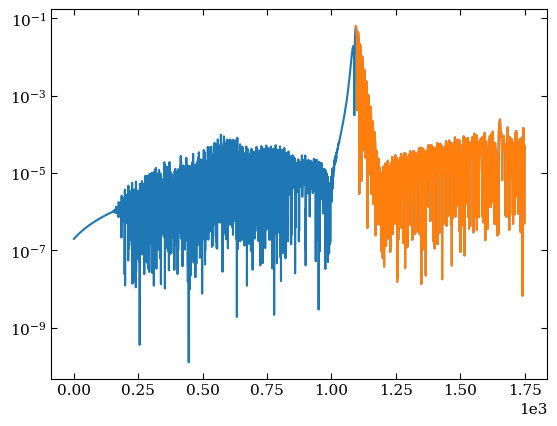

In [6]:
# full waveform is h.fullh (with t = h.fulltime)
plt.semilogy(h.fulltime, np.abs(h.fullh))
# trimmed waveform at peak is h.h (with t = h.time, starting at the peak)
plt.semilogy(h.time + h.peaktime, np.abs(h.h))

In [7]:
# estimate the remnant mass with some free modes.
# Here we use only the 2.2.0 mode. Make sure you are using the l = 2 harmonic above
# if you want to use e.g. l = 4, then use the free 4.4.0 mode for mass estimate

t0_arr = np.linspace(10,20,num=11)
qnm_fixed_list = []
qnm_free_list = long_str_to_qnms_free("2.2.0")
run_string_prefix = f"GRChombo_gamma_{gamma}_l_{l}"

M_mean, M_std = estimate_mass(h, qnm_free_list, 
                  run_string_prefix,
                  tstart = t0_arr[0],
                  tend = t0_arr[-1],
                  qnm_fixed_list = [],
                  t0_arr = t0_arr,
                  load_pickle = False)

print(f"M_mean = {M_mean:.5f} +- {M_std:.5f}")

11it [00:01,  6.39it/s]

M_mean = 0.95233 +- 0.00125


## Finding modes

In [8]:
gamma = 2
l = 4
h = read_data(gamma, l, radius = 1200, box = 4096, base = 960, gamma_scale = False,
              GRChombo_data_root_override = GRChombo_data_root_override)

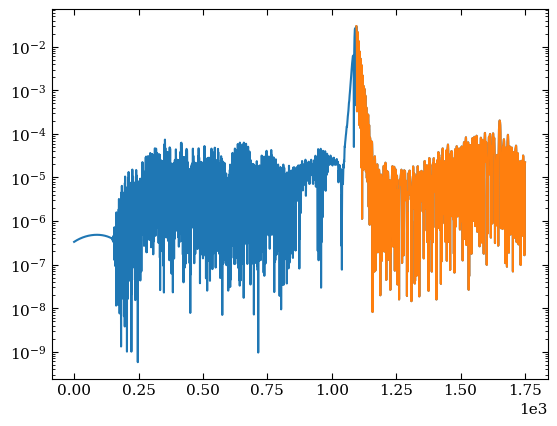

In [9]:
# full waveform is h.fullh (with t = h.fulltime)
plt.semilogy(h.fulltime, np.abs(h.fullh))
# trimmed waveform at peak is h.h (with t = h.time, starting at the peak)
plt.semilogy(h.time + h.peaktime, np.abs(h.h))

In [10]:
t0_arr = np.linspace(0, 40, num = 81)
qnm_fixed_list = [] # the fixed modes you want to use
# uncomment the line below to use more fixed modes
# qnm_fixed_list = long_str_to_qnms_fixed("2.2.0_4.4.0", M_mean, 0)
N_free = 4 # number of free modes
fitter = QNMFitVaryingStartingTime(h,
                t0_arr,
                N_free = N_free,
                Schwarzschild = True,
                qnm_fixed_list = qnm_fixed_list,
                run_string_prefix= run_string_prefix,
                load_pickle = False)

In [11]:
# do the fits
fitter.do_fits()

81it [00:44,  1.82it/s]


In [12]:
result = fitter.result_full

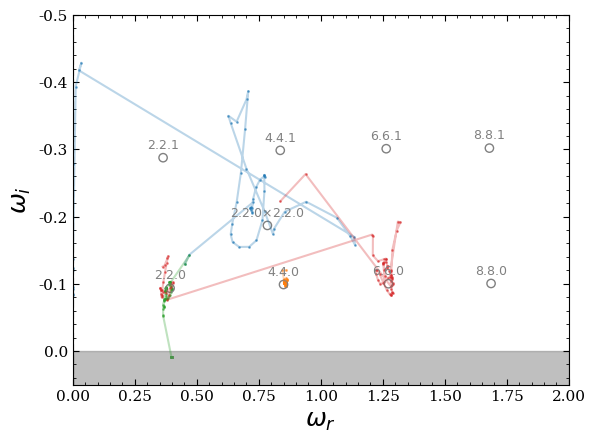

In [13]:
fig, ax = plt.subplots()
plot_omega_free(result, ax = ax)
ax.set_ylim(None, -0.5)
ax.set_xlim(0, 2)
# function below caps ylim at -0.7
plot_predicted_qnms(ax, long_str_to_qnms("2.2.0_2.2.1_4.4.0_4.4.1_"
                                         "6.6.0_6.6.1_8.8.0_8.8.1_"
                                         "2.2.0x2.2.0", M_mean, 0.))

### Now let's fix the frequencies and see if the amplitudes are flat

In [14]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = long_str_to_qnms("2.2.0_4.4.0_6.6.0_2.2.0x2.2.0", M_mean, 0.)
N_free = 0 # number of free modes
fitter_fix = QNMFitVaryingStartingTime(h,
                t0_arr,
                N_free = N_free,
                Schwarzschild = True,
                qnm_fixed_list = qnm_fixed_list,
                run_string_prefix= run_string_prefix,
                load_pickle = False)

In [15]:
fitter_fix.do_fits()

501it [01:46,  4.70it/s]


In [16]:
result_fix = fitter.result_full

KeyError: 'A_2.2.0'

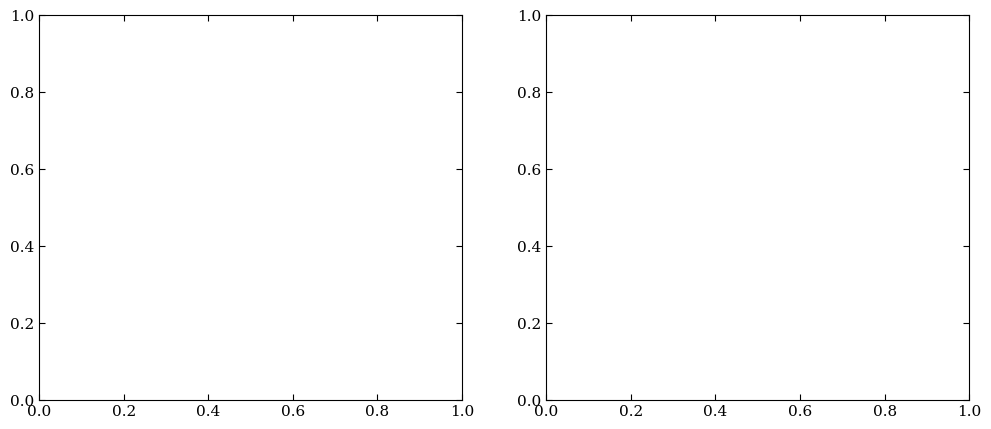

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_amplitudes(result_fix, fixed_modes = qnm_fixed_list, ax = axs[0])
plot_phases(result_fix, fixed_modes = qnm_fixed_list, ax = axs[1])